In [1]:
import RVC3 as rvc
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import math
from math import pi
np.set_printoptions(
    linewidth=120, formatter={
        'float': lambda x: f"{0:8.4g}" if abs(x) < 1e-10 else f"{x:8.4g}"})
np.random.seed(0)
from spatialmath import *
from spatialmath.base import *

SO2 rotation matrix, where angle is in radians

In [2]:
R = rot2(0.3)

the orientation represented by rotation matrix

<Axes: xlabel='X', ylabel='Y'>

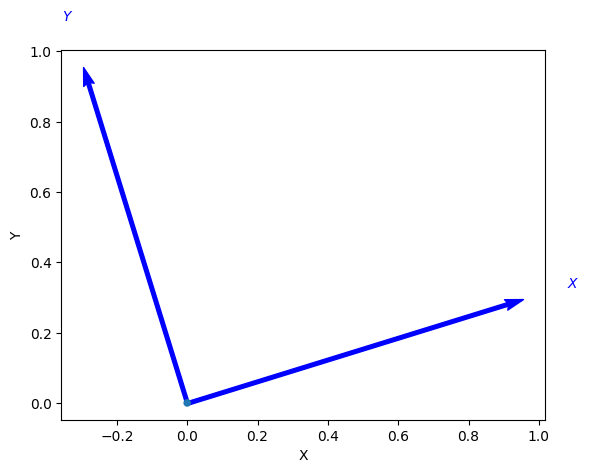

In [3]:
trplot2(R)

determinant property

In [4]:
np.linalg.det(R)

0.9999999999999999

product of 2 rotation matrices 

In [5]:
np.linalg.det(R @ R)

0.9999999999999998

using symbolic mathematics 

In [20]:
from sympy import Symbol, Matrix, simplify
theta = Symbol('theta')
R = Matrix(rot2(theta))
simplify(R * R)


Matrix([
[cos(2*theta), -sin(2*theta)],
[sin(2*theta),  cos(2*theta)]])

In [21]:
R.det()

sin(theta)**2 + cos(theta)**2

In [22]:
R.det().simplify()

1

Matrix Exponential for Rotation

In [23]:
R = rot2(0.3);

In [24]:
L = linalg.logm(R)

In [27]:
S = vex(L)

In [26]:
linalg.expm(L)

array([[  0.9553,  -0.2955],
       [  0.2955,   0.9553]])

In [28]:
linalg.expm(skew(S))

array([[  0.9553,  -0.2955],
       [  0.2955,   0.9553]])

In [33]:
X = skew(2)

In [31]:
vex(X)

array([       2])